# Logistic Regression Model 

### To predict whether a client will subscribe to a bank term deposit 

The data is related with direct marketing campaigns of a European banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) 

### Exploratory Data Analysis

In [3]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

#### Create Datasets for analysis

In [2]:
# Dataframe 1: all clients 
data = pd.read_csv('DSA_Data_Set.csv')

In [3]:
# Dataframe #2: clients who actually subscribed
target_yes = data.loc[data['y']=='yes']

In [4]:
# Dataframe #3: clients who did not subscribe
target_no = data.loc[data['y']=='no']

In [5]:
# see first five rows
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


In [6]:
# see last five rows
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.567417,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.655416,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.574102,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0.615098,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,0.631597,no


#### Find Number of Rows and Columns

In [7]:
# Dataframe 1: all clients
data.shape

(41188, 22)

In [8]:
# Dataframe 2: clients who actually subscribed
target_yes.shape

(4640, 22)

In [9]:
# Dataframe 3: clients who did not subscribe
target_no.shape

(36548, 22)

#### Explore numerical data - Descriptive Statistics

In [10]:
# Dataframe 1: all the data
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


In [11]:
#Dataframe 2: clients who subscribed
target_yes.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991,0.736021
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641,0.195098
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000,0.576202
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000,0.792657
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000,0.935985
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.981402


In [12]:
# Dataframe 3: clients who did not subscribe
target_no.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000
mean,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600,0.906841
std,9.898132,207.096293,2.873438,120.656868,0.409199,1.482932,0.558993,4.391155,1.638187,64.571979,0.097924
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.272060
25%,32.000000,95.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000,0.881547
50%,38.000000,163.500000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000,0.948100
75%,47.000000,279.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000,0.959982
max,95.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


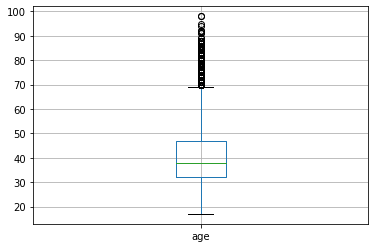

In [13]:
# The distributions of the three dataframes for the numerical variables are significantly similar. 
# Therefore, for visualizing the numerical variables, we will only use the Dataframe #1. It contains all the data
# the following visualizations are made in order to visualize the presence of outliers and the interquartile ranges
boxplot = data.boxplot(column=["age"])

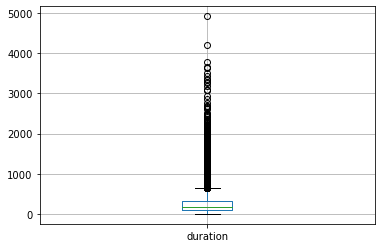

In [14]:
boxplot = data.boxplot(column=["duration"])

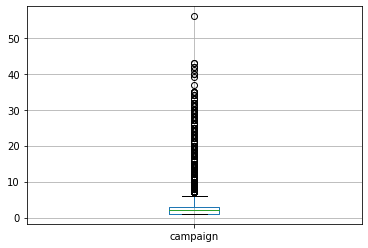

In [15]:
boxplot = data.boxplot(column=["campaign"])

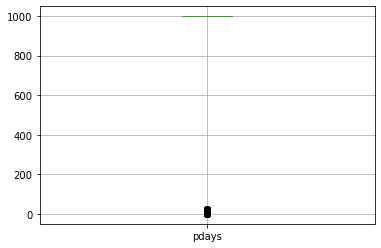

In [16]:
boxplot = data.boxplot(column=["pdays"])

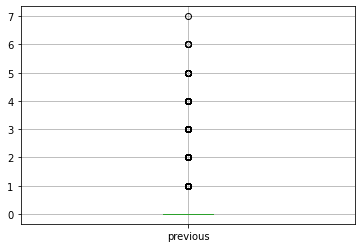

In [17]:
boxplot = data.boxplot(column=["previous"])

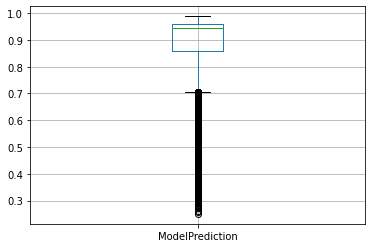

In [18]:
boxplot = data.boxplot(column=["ModelPrediction"])

#### Explore categorical data

In [19]:
# get column names
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'ModelPrediction', 'y'],
      dtype='object')

In [20]:
# get the unique values in each column
data.nunique()

age                   78
job                   12
marital                4
education              8
default                3
housing                3
loan                   3
contact                2
month                 10
day_of_week            5
duration            1544
campaign              42
pdays                 27
previous               8
poutcome               3
emp.var.rate          10
cons.price.idx        26
cons.conf.idx         26
euribor3m            316
nr.employed           11
ModelPrediction    38444
y                      2
dtype: int64

#### Job

In [21]:
#job types
data['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [22]:
order_list = ['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student']

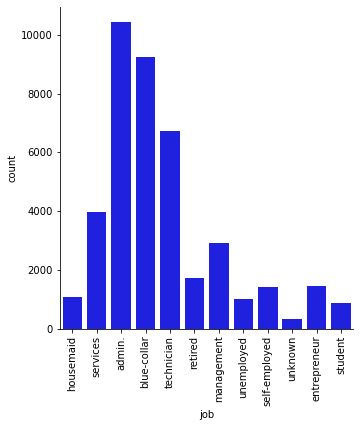

In [23]:
# Dataframe 1: all the data
job = sns.factorplot("job", data=data, aspect=1, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=90)

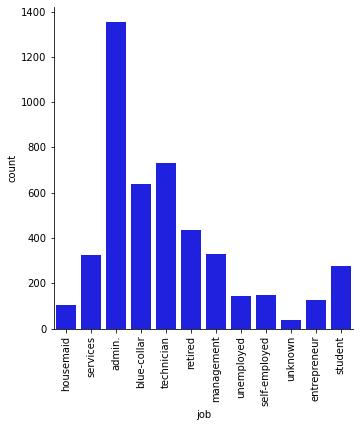

In [24]:
#dataframe 2: clients who actually subscribed
job = sns.factorplot("job", data=target_yes, aspect=1, kind="count", color="b", order=order_list )
job.set_xticklabels(rotation=90)

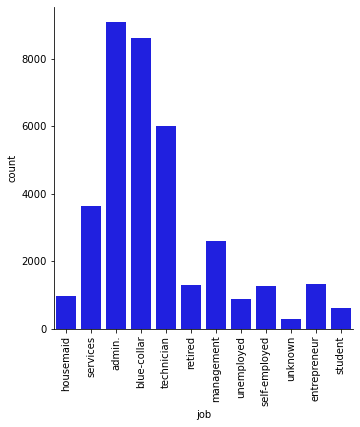

In [25]:
#clients who did not subscribe
job = sns.factorplot("job", data=target_no, aspect=1, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=90)

In [26]:
#job insights:
# admin, blue-collar, technician are the most relevant jobs for all dataframes.  They have similar distributions
#unknown values are small

#### Marital Status

In [27]:
#find marital status categories
data['marital'].unique()

array(['married', 'single', 'divorced', 'unknown'], dtype=object)

In [28]:
order_list = ['married', 'single', 'divorced', 'unknown']

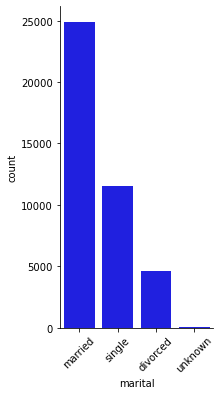

In [29]:
# Dataframe 1: all clients
job = sns.factorplot("marital", data=data, aspect=0.6, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=45)

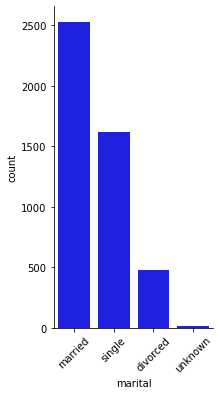

In [30]:
#Dataframe 2: clients who subscribed
job = sns.factorplot("marital", data=target_yes, aspect=0.6, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=45)

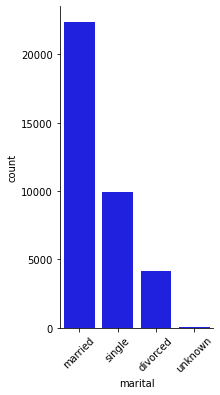

In [31]:
#clients who did not subscribe
job = sns.factorplot("marital", data=target_no, aspect=0.6, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=45)

In [32]:
#marital status insights:
# married is the most relevant marital status for all dataframes respectively.  
#They have similar distributions
#unknown values are the smallest category

#### Education level

In [33]:
#find education levels
data['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [34]:
order_list = ['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate']

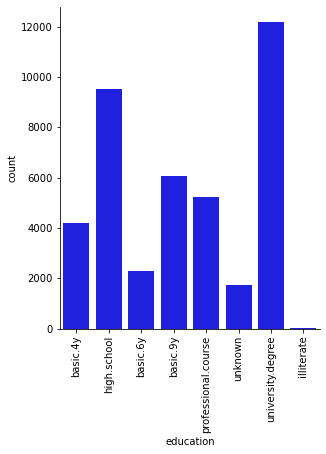

In [35]:
#Dataframe 1 - all data
job = sns.factorplot("education", data=data, aspect=0.9, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=90)

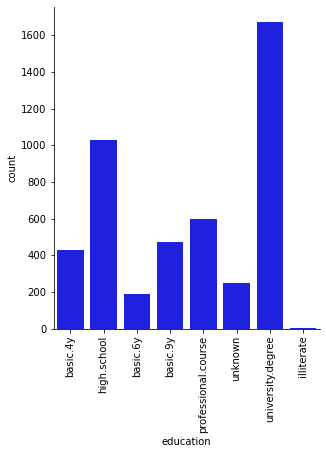

In [36]:
# Dataframe 2 - clients who subscribed
job = sns.factorplot("education", data=target_yes, aspect=0.9, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=90)

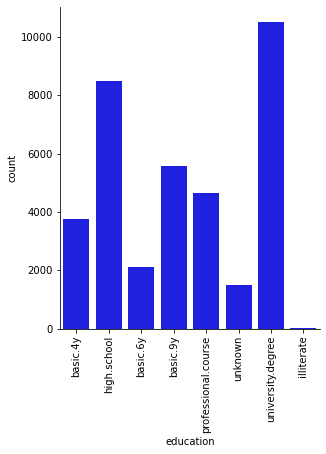

In [37]:
#Dataframe 3 - clients who did not subscribe
job = sns.factorplot("education", data=target_no, aspect=0.9, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=90)

In [38]:
#Education insights:
# University and high school are the most relevant education types for all dataframes respectively.  
#They have similar distributions
#unknown values are small

#### Default

In [39]:
#find unique values
data['default'].unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [40]:
order_list = ['no', 'unknown', 'yes']

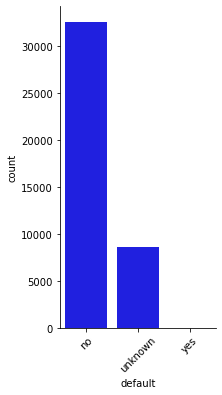

In [41]:
#Dataframe 1 - all data
job = sns.factorplot("default", data=data, aspect=0.6, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=45)

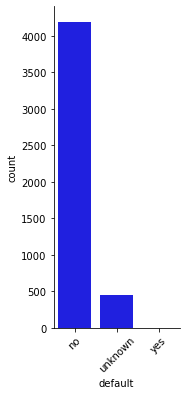

In [42]:
#for those who subscribed. Outcome=Yes
job = sns.factorplot("default", data=target_yes, aspect=0.5, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=45)

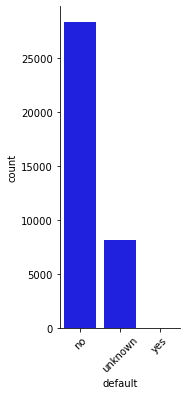

In [43]:
#For those who did not subscribed.  Outcome=no
job = sns.factorplot("default", data=target_no, aspect=0.5, kind="count", color="b", order= order_list )
job.set_xticklabels(rotation=45)

In [44]:
#Default insights:
# No is the most relevant category for all dataframes.  
#They have similar distributions
#unknown values might need to be investigated

#### Housing loan

In [45]:
#find unique columns
data['housing'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [46]:
order_values = ['no', 'yes', 'unknown']

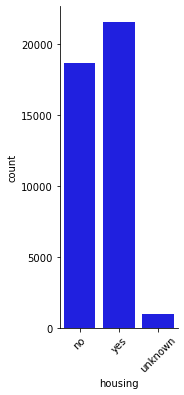

In [47]:
#entire dataset
job = sns.factorplot("housing", data=data, aspect=0.5, kind="count", color="b", order=order_values)
job.set_xticklabels(rotation=45)

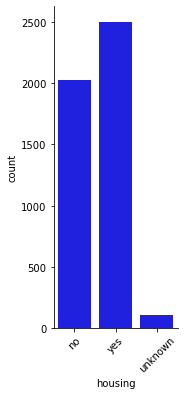

In [48]:
#for those who subscribed. Outcome=Yes
job = sns.factorplot("housing", data=target_yes, aspect=0.5, kind="count", color="b", order=order_values)
job.set_xticklabels(rotation=45)

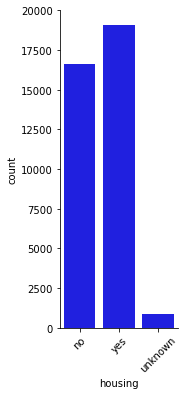

In [49]:
#For those who did not subscribed.  Outcome=no
job = sns.factorplot("housing", data=target_no, aspect=0.5, kind="count", color="b", order=order_values)
job.set_xticklabels(rotation=45)

In [50]:
#house loan insights:
# Yes is the most relevant category for all dataframes.  
#They have similar distributions
#unknown values are the smallest category

#### Personal loan

In [51]:
#find unique values
data['loan'].unique()

array(['no', 'yes', 'unknown'], dtype=object)

In [52]:
order_values= ['no', 'yes', 'unknown']

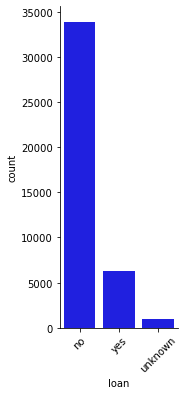

In [53]:
#Dataframe 1 = all data
job = sns.factorplot("loan", data=data, aspect=0.5, kind="count", color="b", order=order_values)
job.set_xticklabels(rotation=45)

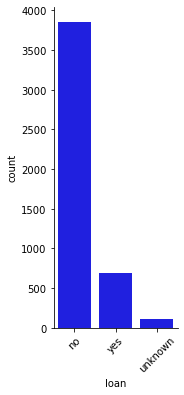

In [54]:
#Dataframe 2 - subscribed
job = sns.factorplot("loan", data=target_yes, aspect=0.5, kind="count", color="b", order=order_values)
job.set_xticklabels(rotation=45)

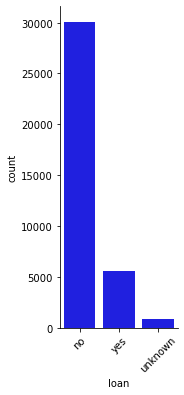

In [55]:
#Dataframe 3 - Did not subscribe
job = sns.factorplot("loan", data=target_no, aspect=0.5, kind="count", color="b", order=order_values)
job.set_xticklabels(rotation=45)

In [56]:
#personal loan insights:
# No is the most relevant category for all dataframes.  
#They have similar distributions
#unknown values are the smallest category

#### Contact communication type

In [57]:
#contact communication type
data['contact'].unique()

array(['telephone', 'cellular'], dtype=object)

In [58]:
order_list=['telephone', 'cellular']

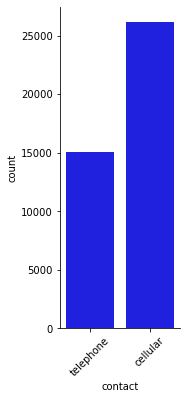

In [59]:
#Dataframe 1 - all data
job = sns.factorplot("contact", data=data, aspect=0.5, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=45)

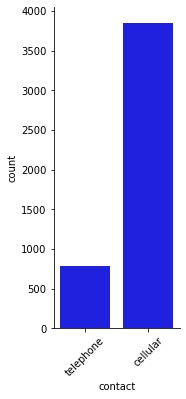

In [60]:
#Dataframe 2: Subscribed
job = sns.factorplot("contact", data=target_yes, aspect=0.5, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=45)

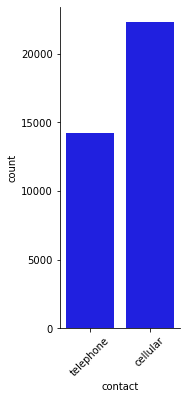

In [61]:
#Dataframe 3: Did not subscribe
job = sns.factorplot("contact", data=target_no, aspect=0.5, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=45)

In [62]:
#contact inisht: celular is the most representative category among the three dataframes

#### Last Contact - Month

In [63]:
#last contact - month
data['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], dtype=object)

In [64]:
order_list = ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep']

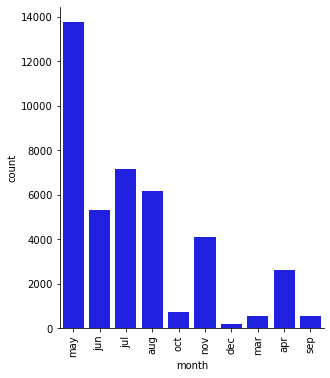

In [65]:
#dataframe 1 - entire dataset
job = sns.factorplot("month", data=data, aspect=0.9, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=90)

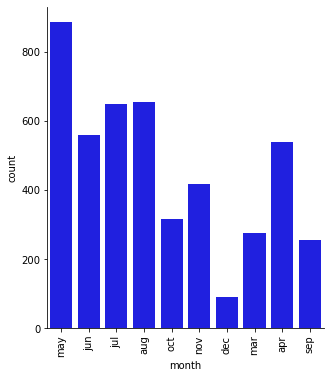

In [66]:
#Dataframe 2 - subscribed
job = sns.factorplot("month", data=target_yes, aspect=0.9, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=90)

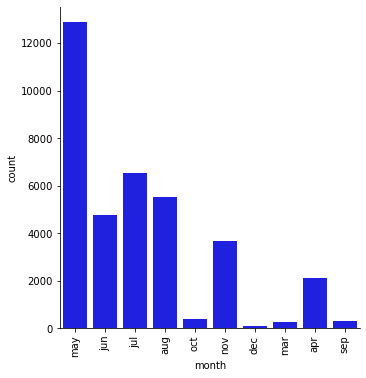

In [67]:
#Dataframe 3 - Did not subscribe
job = sns.factorplot("month", data=target_no, aspect=1, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=90)

In [68]:
#may, july, august most relevant among the three categories.

#### Last Contact - day of week

In [224]:
#find unique categories
data['day_of_week'].unique()

array(['mon', 'tue', 'wed', 'thu', 'fri'], dtype=object)

In [225]:
order_list= ['mon', 'tue', 'wed', 'thu', 'fri']

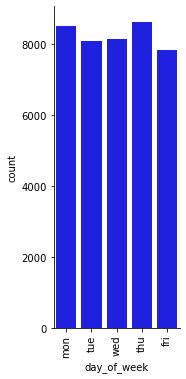

In [226]:
# Dataframe 1 - entire dataset
job = sns.factorplot("day_of_week", data=data, aspect=0.5, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=90)

In [227]:
data['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

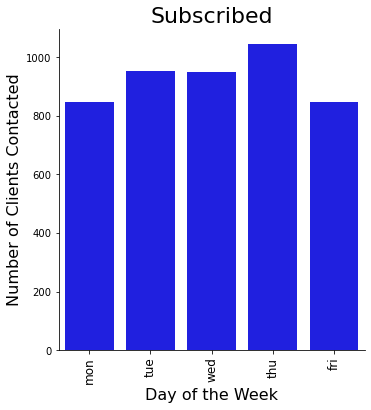

In [228]:
#Dataframe 2 - subscribed
job = sns.factorplot("day_of_week", data=target_yes, aspect=1, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=90)
plt.xlabel("Day of the Week", size=16)
plt.ylabel("Number of Clients Contacted", size=16)
plt.title("Subscribed", size=22)
plt.xticks(fontsize=12)
plt.show(job)


In [229]:
target_yes['day_of_week'].value_counts()

thu    1045
tue     953
wed     949
mon     847
fri     846
Name: day_of_week, dtype: int64

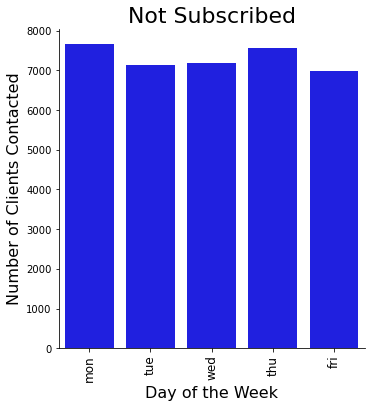

In [230]:
#Dataframe 3: Did not subscribe
job = sns.factorplot("day_of_week", data=target_no, aspect=1, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=90)
plt.xlabel("Day of the Week", size=16)
plt.ylabel("Number of Clients Contacted", size=16)
plt.title("Not Subscribed", size=22)
plt.xticks(fontsize=12)
plt.show(job)

In [76]:
target_no['day_of_week'].value_counts()

mon    7667
thu    7578
wed    7185
tue    7137
fri    6981
Name: day_of_week, dtype: int64

In [77]:
#Monday is the most representative day for the clients who did not subscribe but it is the least
#representative for the clients who subscribed
#Thursday, Wednesday and Thrusdays are the best days to call and obtain conversions

#### Outcome of the previous marketing campaign

In [232]:
data['poutcome'].unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [233]:
order_list= ['nonexistent', 'failure', 'success']

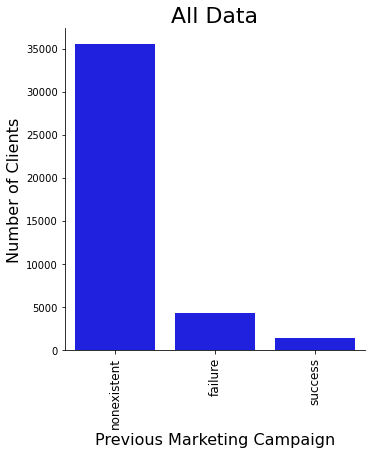

In [241]:
#Dataframe 1 - All data
job = sns.factorplot("poutcome", data=data, aspect=1, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=90)
plt.xlabel("Previous Marketing Campaign", size=16)
plt.ylabel("Number of Clients", size=16)
plt.title("All Data", size=22)
plt.xticks(fontsize=12)
plt.show(job)

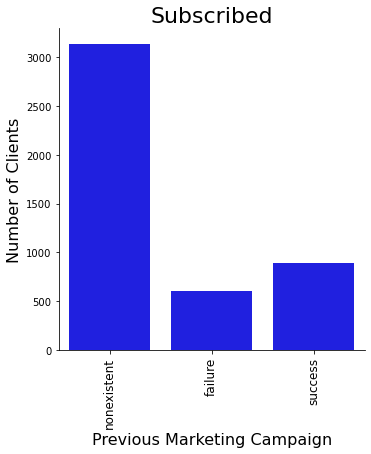

In [242]:
#Dataframe 2 = subscribed
job = sns.factorplot("poutcome", data=target_yes, aspect=1, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=90)
plt.xlabel("Previous Marketing Campaign", size=16)
plt.ylabel("Number of Clients", size=16)
plt.title("Subscribed", size=22)
plt.xticks(fontsize=12)
plt.show(job)

In [82]:
target_yes['poutcome'].value_counts()

nonexistent    3141
success         894
failure         605
Name: poutcome, dtype: int64

In [83]:
target_yes['poutcome'].value_counts(normalize=True)

nonexistent    0.676940
success        0.192672
failure        0.130388
Name: poutcome, dtype: float64

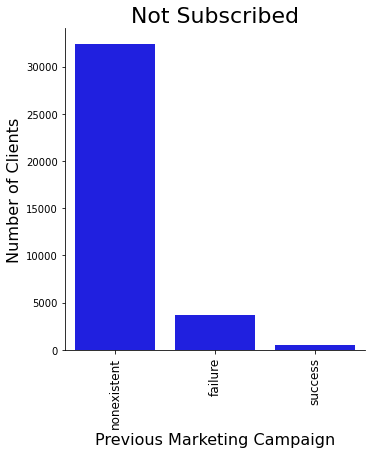

In [243]:
#Dataframe 3 - did not subscribe
job = sns.factorplot("poutcome", data=target_no, aspect=1, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=90)
plt.xlabel("Previous Marketing Campaign", size=16)
plt.ylabel("Number of Clients", size=16)
plt.title("Not Subscribed", size=22)
plt.xticks(fontsize=12)
plt.show(job)

In [85]:
target_no['poutcome'].value_counts()

nonexistent    32422
failure         3647
success          479
Name: poutcome, dtype: int64

In [86]:
print (target_no['poutcome'].value_counts(normalize=True))

nonexistent    0.887107
failure        0.099787
success        0.013106
Name: poutcome, dtype: float64


In [87]:
#from the customers who converted in this campaign, 19% converted in previous campaigns
#from the customers who did not convert in this campaign, 1% converted in previous campaigns
#insight: customers who converted previously might be more receptive to these marketing campaigns.

### Clean Data

In [88]:
#find missing values
data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
ModelPrediction    0
y                  0
dtype: int64

In [89]:
# not missing values.  However, it might be interesting to investigate unknown values

In [90]:
#drop innecesary columns: duration column, ModelPrediction
data_clean = data.drop(['duration', 'ModelPrediction'], axis=1)
data_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Investigate outliers

In [91]:
# Determine interquartile range for numerical variables
Q1 = data_clean.quantile(0.25)
Q3 = data_clean.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

age                15.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


In [92]:
#How many outliers detected? 8k+ 
#It is a large portion. It is recommended to investigate further what happened in those events before 
#removing them from our analysis
# if the outliers were a mistake, it is recommended to remove them from the analysis
data_clean_out = data_clean[~((data_clean < (Q1 - 1.5 * IQR)) |(data_clean > (Q3 + 1.5 * IQR))).any(axis=1)]
data_clean_out.shape

(32765, 20)

In [93]:
data.shape

(41188, 22)

### Relationship Analysis

In [94]:
correlation = data_clean.corr()

<AxesSubplot:>

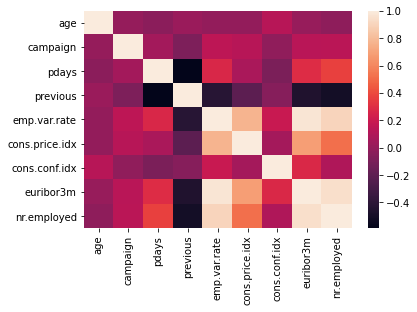

In [95]:
sns.heatmap(correlation)

In [96]:
#there are strong correlation in between the social and economic context atributes

<AxesSubplot:xlabel='ModelPrediction', ylabel='Density'>

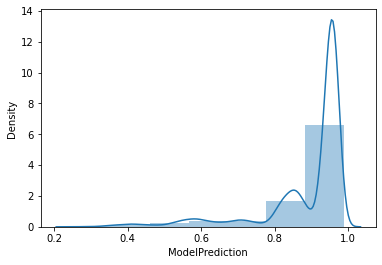

In [97]:
# the existing model predicts that most of the customers will subscribe to the term deposit.  Therefore it
#is suggesting to call most of the clients when doing a telemarketing campaign
sns.distplot(data['ModelPrediction'], bins=7)

#### Evaluation of current model

In [98]:
#extracting ModelPrediction and actual outcome columns of all dataset
evaluation = data[['ModelPrediction', 'y']]
evaluation.head()

,ModelPrediction,y
0,0.932750,no
1,0.953579,no
2,0.945724,no
3,0.933875,no
4,0.940996,no


In [99]:
#converting model prediction into binary.  Logistic regression if > 50 then it predicted yes subscribed = 1
evaluation.loc[evaluation['ModelPrediction'] > 0.5, 'y_predicted'] = 1 

In [100]:
evaluation.loc[evaluation['ModelPrediction'] < 0.5, 'y_predicted'] = 0 

In [101]:
evaluation.head()

,ModelPrediction,y,y_predicted
0,0.932750,no,1.0
1,0.953579,no,1.0
2,0.945724,no,1.0
3,0.933875,no,1.0
4,0.940996,no,1.0


In [102]:
#prepare current model prediction data to graph and put in slide
evaluation.loc[evaluation['y_predicted'] == 1.0, 'y_pred_graph'] = "yes" 

In [103]:
evaluation.loc[evaluation['y_predicted'] == 0.0, 'y_pred_graph'] = "no" 

In [104]:
evaluation.head()

,ModelPrediction,y,y_predicted,y_pred_graph
0,0.932750,no,1.0,yes
1,0.953579,no,1.0,yes
2,0.945724,no,1.0,yes
3,0.933875,no,1.0,yes
4,0.940996,no,1.0,yes


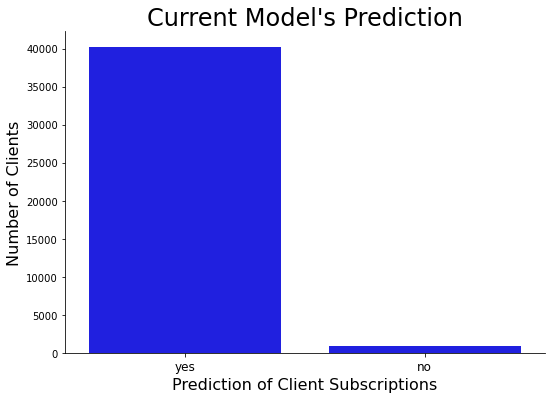

In [105]:
#plot current model prediction
y_pred_graph = sns.factorplot("y_pred_graph", data=evaluation, aspect=1.5, kind="count", color="b")
job.set_xticklabels(rotation=45)
plt.xlabel("Prediction of Client Subscriptions", size=16)
plt.ylabel("Number of Clients", size=16)
plt.title("Current Model's Prediction", size=24)
plt.xticks(fontsize=12)
plt.show(y_pred_graph)

In [106]:
#category count
evaluation['y_pred_graph'].value_counts()

yes    40251
no       937
Name: y_pred_graph, dtype: int64

In [107]:
#percentage of categories
print (evaluation['y_pred_graph'].value_counts(normalize=True))
#the current model suggests that 98% of our clients in the dataset will probably subscribe to a term deposit

yes    0.977251
no     0.022749
Name: y_pred_graph, dtype: float64


#### How accurate is the existing model?

In [108]:
evaluation.head()

,ModelPrediction,y,y_predicted,y_pred_graph
0,0.932750,no,1.0,yes
1,0.953579,no,1.0,yes
2,0.945724,no,1.0,yes
3,0.933875,no,1.0,yes
4,0.940996,no,1.0,yes


In [109]:
order_list=['yes', "no"]

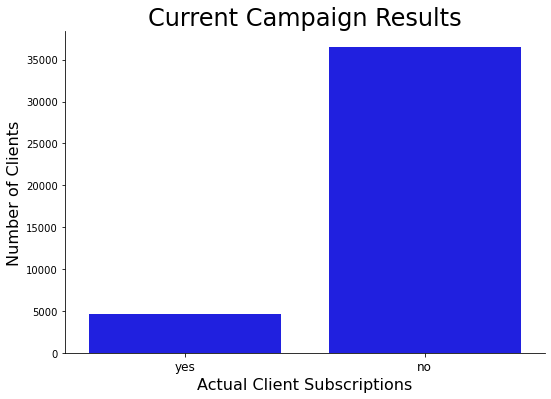

In [110]:
#create plot with the results of the current campaign that used the current model
y_actual_graph = sns.factorplot("y", data=evaluation, aspect=1.5, kind="count", color="b", order=order_list)
job.set_xticklabels(rotation=45)
plt.xlabel("Actual Client Subscriptions", size=16)
plt.ylabel("Number of Clients", size=16)
plt.title("Current Campaign Results", size=24)
plt.xticks(fontsize=12)
plt.show(y_actual_graph)

In [111]:
#category count of y
evaluation['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [112]:
#percentage of categories of y column
print (evaluation['y'].value_counts(normalize=True))
#the actual output was that only 11% of our clients in the dataset subscribed to a term deposit

no     0.887346
yes    0.112654
Name: y, dtype: float64


In [113]:
# The current model is not very accurate at predicting which clients will not subscribe
#This might affect the customer experience

#### Evaluate current model's metrics: confusion matrix, precision, recall and f1 score

In [114]:
#predicted column
y_predict = evaluation['y_pred_graph']

In [115]:
#actual outcome
y_act = evaluation['y']

In [116]:
# create confusion matrix to analyze actuals vs predicted
cm = confusion_matrix(y_act, y_predict)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,257,36291
Actual 1,680,3960


In [117]:
# Calculate the accuracy score
acc_score = balanced_accuracy_score(y_act, y_predict)
acc_score

0.4302400621950161

In [118]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_act, y_predict))

                   pre       rec       spe        f1       geo       iba       sup

         no       0.27      0.01      0.85      0.01      0.08      0.01     36548
        yes       0.10      0.85      0.01      0.18      0.08      0.01      4640

avg / total       0.25      0.10      0.76      0.03      0.08      0.01     41188



In [119]:
#the current model is not ideal to predict whether a client will subscribe or not.
# 0.43 of accuracy score is a low metric
# the f1 score is too low.  There is not a balance between precision and recall.
#the model does not really do segmentation
#It is recommended to build a new model

### Build an Alternative Logistic Regression Model

In [120]:
#make sure I have the right columns in data_clean dataframe
data_clean.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [121]:
#check data types
data_clean.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [122]:
#name feautures and target
columns = ["age", "job", "marital", "education", "default","housing", "loan", "contact", "month", "day_of_week",
          "campaign ", "pdays", "previous", "poutcome", "emp.var.rate","cons.price.idx", "cons.conf.idx", 
           "euribor3m", "nr.employed"]

target = ["y"]

In [123]:
#split data into training and testing

# Create our features - drop target column
X = data_clean.drop(columns='y')

#clean features
X = pd.get_dummies(X)

# Create our target
y = data_clean.loc[:, target].copy()
X.head()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,1,...,0,0,0,1,0,0,0,0,1,0
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,...,0,0,0,1,0,0,0,0,1,0


#### Check if there is class imbalance to determine if resampling techniques are necessary

In [124]:
# Check the balance of our target values
y["y"].value_counts()

##We have imbalanced data.  Have significantly more observations in the class 'no'.  Therefore we apply different
#resampling techniques before training the model with logistic regression

no     36548
yes     4640
Name: y, dtype: int64

In [125]:
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

#### Resampling technique #1: Resample the training data with the Random Oversampler

This is the best performing model among all the techniques used. See summary of the models at the bottom

In [166]:
# Resample data
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({'y': 1})

In [167]:
# Train the Logistic Regression model using the resampled data
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [168]:
# Calculate the balanced accuracy score 
y_Rand_Ov = model.predict(X)
print(balanced_accuracy_score(y, y_Rand_Ov))

0.7254769471795239


In [169]:
# Calculating the confusion matrix 
cm = confusion_matrix(y, y_Rand_Ov)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,27501,9047
Actual 1,1399,3241


In [170]:
# Print the imbalanced classification report 
print(classification_report_imbalanced(y, y_Rand_Ov))

                   pre       rec       spe        f1       geo       iba       sup

         no       0.95      0.75      0.70      0.84      0.72      0.53     36548
        yes       0.26      0.70      0.75      0.38      0.72      0.52      4640

avg / total       0.87      0.75      0.70      0.79      0.72      0.53     41188



New Model Output

In [171]:
#creating a column with the prediction of the new model
#new model output
y_Rand_Ov = model.predict(X)

evaluation['y_Rand_Ov'] = y_Rand_Ov

In [172]:
evaluation.head()

,ModelPrediction,y,y_predicted,y_pred_graph,y_Rand_Ov
0,0.932750,no,1.0,yes,no
1,0.953579,no,1.0,yes,no
2,0.945724,no,1.0,yes,no
3,0.933875,no,1.0,yes,no
4,0.940996,no,1.0,yes,no


In [173]:
order_list1=['yes', "no"]

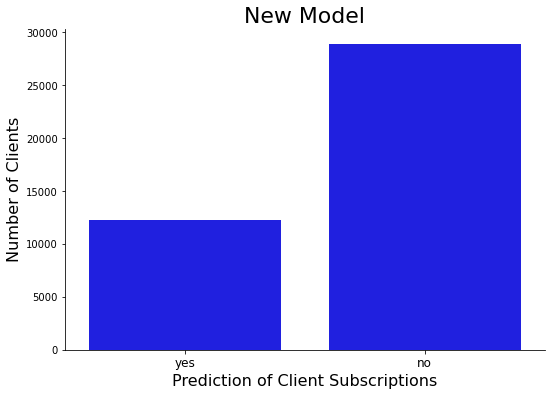

In [174]:
#plot new model's approach
y_Rand_Ov = sns.factorplot("y_Rand_Ov", data=evaluation, aspect=1.5, kind="count", color="b", order=order_list1)
job.set_xticklabels(rotation=45)
plt.xlabel("Prediction of Client Subscriptions", size=16)
plt.ylabel("Number of Clients", size=16)
plt.title("New Model", size=22)
plt.xticks(fontsize=12)
plt.show(y_Rand_Ov)

In [175]:
#category count 
evaluation['y_Rand_Ov'].value_counts()

no     28900
yes    12288
Name: y_Rand_Ov, dtype: int64

In [176]:
#percentage of categories
print (evaluation['y_Rand_Ov'].value_counts(normalize=True))
#the new model suggests that 30% of our clients in the dataset will probably subscribe to a term deposit

no     0.701661
yes    0.298339
Name: y_Rand_Ov, dtype: float64


#### Resampling technique #2: Resample the training data using the ClusterCentroids resampler

In [182]:
cc = ClusterCentroids(random_state=1)
X_resampled, y_resampled = cc.fit_resample(X_train, y_train)
Counter(y_resampled)

Counter({'y': 1})

In [183]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [184]:
# Calculated the balanced accuracy score
y_pred = model.predict(X_test)
print(balanced_accuracy_score(y_test, y_pred))

0.5347452433455715


In [185]:
confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])
cm_df

,Predicted 0,Predicted 1
Actual 0,7907,1225
Actual 1,591,574


In [186]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

         no       0.94      0.14      0.93      0.24      0.36      0.12      9132
        yes       0.12      0.93      0.14      0.21      0.36      0.14      1165

avg / total       0.85      0.23      0.84      0.24      0.36      0.12     10297



#### Summary of models performance

In [4]:
summary_performance = pd.DataFrame(
    {"Current Model":{'AccuracyScore': 0.43, 'Precision': 0.25, "Recall":0.10, "F1-Score":0.03},
     "Naive Random Oversampling":{'AccuracyScore': 0.72, 'Precision': 0.87, "Recall":0.75, "F1-Score":0.79},
     "ClusterCentroids":{'AccuracyScore': 0.53, 'Precision': 0.85, "Recall":0.23,"F1-Score":0.24}
     })

In [5]:
summary_performance

,Current Model,Naive Random Oversampling,ClusterCentroids
AccuracyScore,0.43,0.72,0.53
Precision,0.25,0.87,0.85
Recall,0.10,0.75,0.23
F1-Score,0.03,0.79,0.24
